<a href="https://colab.research.google.com/github/Mehpara/Datasets/blob/main/DS_3_LR%2C_SVC%2C_SDG_Classifiers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install scikit-multilearn
!pip install simplekml

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 89 kB 2.1 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 52 kB 839 kB/s 
  Created wheel for simplekml: filename=simplekml-1.3.6-py3-none-any.whl size=65876 sha256=00803b8e2ccd7aaea9336613202333f2207656fe7169c39bfa3668e3923f22a9
  Stored in directory: /root/.cache/pip/wheels/5c/ec/e6/10af1a1fb29ffca95151d4c886d6e06fc309c68f46519892de
Successfully built simplekml


In [ ]:
# Load EDA Pkgs
import pandas as pd
import numpy as np
# Load Data Viz Pkgs
import matplotlib.pyplot as plt
import seaborn as sns
#/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
import pandas.util.testing as tm
# ML Pkgs
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.metrics import hamming_loss
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
### Split Dataset into Train and Text
from sklearn.model_selection import train_test_split

# Feature engineering
from sklearn.feature_extraction.text import TfidfVectorizer
# Multi Label Pkgs

from skmultilearn.adapt import MLkNN

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  


In [ ]:
# Load Dataset 3
df = pd.read_csv("https://raw.githubusercontent.com/Mehpara/Datasets/main/movies_reviews.csv")
df.head()

,id,comment_text,Action,Adult,Adventure,Animation,Biography,Comedy
0,"""#7DaysLater"" (2013)",dayslater interactive comedy series feature en...,0,0,0,0,0,1
1,"""#BlackLove"" (2015) {Crash the Party (#1.9)}",week leave workshops women consider idea ladie...,0,0,0,0,0,0
2,"""#BlackLove"" (2015) {Making Lemonade Out of Le...",women start make stride towards find version h...,0,0,0,0,0,0
3,"""#BlackLove"" (2015) {Miss Independent (#1.5)}",women independent strong theyve face strife re...,0,0,0,0,0,0
4,"""#BlackLove"" (2015) {Sealing the Deal (#1.10)}",despite go life change process past weeks wome...,0,0,0,0,0,0


In [ ]:
df.dtypes

id              object
comment_text    object
Action           int64
Adult            int64
Adventure        int64
Animation        int64
Biography        int64
Comedy           int64
dtype: object

In [ ]:
df.info



<bound method DataFrame.info of                                                     id  \
0                                 "#7DaysLater" (2013)   
1         "#BlackLove" (2015) {Crash the Party (#1.9)}   
2    "#BlackLove" (2015) {Making Lemonade Out of Le...   
3        "#BlackLove" (2015) {Miss Independent (#1.5)}   
4       "#BlackLove" (2015) {Sealing the Deal (#1.10)}   
..                                                 ...   
995  "60 Minutes" (1968) {Ambush in Afghanistan/The...   
996  "60 Minutes" (1968) {America's Missile Fields/...   
997  "60 Minutes" (1968) {America's New Air Force/T...   
998  "60 Minutes" (1968) {An American Town/The Comm...   
999  "60 Minutes" (1968) {An Imperfect Union/The Sp...   

                                          comment_text  Action  Adult  \
0    dayslater interactive comedy series feature en...       0      0   
1    week leave workshops women consider idea ladie...       0      0   
2    women start make stride towards find version h.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


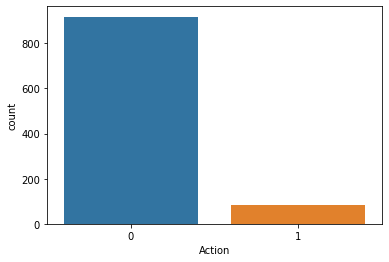

In [ ]:
# Value Count 
sns.countplot(df['Action'])

In [ ]:
#Text Preprocessing    neattext : remove_stopwords  
!pip install neattext
import neattext as nt
import neattext.functions as nfx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 114 kB 2.1 MB/s 


In [ ]:
# Explore For Noise
df['comment_text'].apply(lambda x:nt.TextFrame(x).noise_scan())

0      {'text_noise': 0.9259259259259258, 'text_lengt...
1      {'text_noise': 1.1299435028248588, 'text_lengt...
2      {'text_noise': 1.8315018315018317, 'text_lengt...
3      {'text_noise': 0.2976190476190476, 'text_lengt...
4      {'text_noise': 3.0534351145038165, 'text_lengt...
                             ...                        
995    {'text_noise': 0, 'text_length': 252, 'noise_c...
996    {'text_noise': 0.5263157894736842, 'text_lengt...
997    {'text_noise': 0, 'text_length': 193, 'noise_c...
998    {'text_noise': 0.7920792079207921, 'text_lengt...
999    {'text_noise': 0.4524886877828055, 'text_lengt...
Name: comment_text, Length: 1000, dtype: object

In [ ]:
# Explore For Noise
df['comment_text'].apply(lambda x:nt.TextExtractor(x).extract_stopwords())

0                                [via, well]
1                             [towards, put]
2      [make, towards, become, even, though]
3                                     [make]
4                       [go, still, get, go]
                       ...                  
995                                       []
996                                 [behind]
997                                       []
998                     [back, go, see, see]
999                                   [make]
Name: comment_text, Length: 1000, dtype: object

In [ ]:
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [ ]:
# Explore For Noise
df['comment_text'].apply(nfx.remove_stopwords)

0      dayslater interactive comedy series feature en...
1      week leave workshops women consider idea ladie...
2      women start stride find version happy end tenn...
3      women independent strong theyve face strife re...
4      despite life change process past weeks women i...
                             ...                        
995    ambush afghanistan examine sophisticate tactic...
996    americas missile field rebroadcast special sce...
997    americas new air force look rise u militarys u...
998    special hour edition look attack american town...
999    safer announce recent death longtime contribut...
Name: comment_text, Length: 1000, dtype: object

In [ ]:
corpus = df['comment_text'].apply(nfx.remove_stopwords)

In [ ]:
tfidf = TfidfVectorizer()
tfidf

TfidfVectorizer()

In [ ]:
# Build Features
Xfeatures = tfidf.fit_transform(corpus).toarray()
Xfeatures

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
y = df[['Action', 'Adult','Adventure','Animation','Biography', 'Comedy' ]]
y

,Action,Adult,Adventure,Animation,Biography,Comedy
0,0,0,0,0,0,1
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0
...,...,...,...,...,...,...
995,0,0,0,0,0,0
996,0,0,0,0,0,0
997,0,0,0,0,0,0
998,0,0,0,0,0,0


In [ ]:
# Split Data 
X_train,X_test,y_train,y_test = train_test_split(Xfeatures,y,test_size=0.3,random_state=42)
print(df['comment_text'].shape)
print(X_train.shape)

(1000,)
(700, 9110)


In [ ]:
# Building Our Model
import skmultilearn
dir(skmultilearn)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'adapt',
 'base',
 'utils']

In [ ]:
from sklearn.multiclass import OneVsRestClassifier
sgd=SGDClassifier()
lr=LogisticRegression(solver='lbfgs')
svc=LinearSVC()

In [ ]:
def j_score(y_true,y_pred): 
  jaccard = np.minimum(y_true, y_pred).sum(axis=1)/np.maximum(y_true, y_pred).sum(axis=1)
  return jaccard.mean()*100

In [ ]:
def print_score(y_pred, clf):
  print("clf:", clf.__class__.__name__)
  print('jaccard score: {}'.format(j_score(y_test, y_pred)))
  print('...................................')

In [ ]:
for classifier in [svc]:
  clf=OneVsRestClassifier(classifier)
  clf.fit(X_train,y_train)
  y_pred=clf.predict(X_test)


print("hamming loss: ")
print(hamming_loss(y_test, y_pred))

print("accuracy:")
print(accuracy_score(y_test, y_pred))

print("f1 score:")
print("micro")
print(f1_score(y_test, y_pred, average='micro'))
print("macro")
print(f1_score(y_test, y_pred, average='macro'))

print("precision:")
print("micro")
print(precision_score(y_test, y_pred, average='micro'))
print("macro")
print(precision_score(y_test, y_pred, average='macro'))

print("recall:")
print("micro")
print(recall_score(y_test, y_pred, average='micro'))
print("macro")
print(recall_score(y_test, y_pred, average='macro'))


print_score(y_pred, classifier)

/usr/local/lib/python3.7/dist-packages/sklearn/multiclass.py:80: UserWarning: Label not 1 is present in all training examples.
  "Label %s is present in all training examples." % str(classes[c])


hamming loss: 
0.03111111111111111
accuracy:
0.8433333333333334
f1 score:
micro
0.7741935483870968
macro
0.301991341991342
precision:
micro
0.9896907216494846
macro
0.4979166666666666
recall:
micro
0.6357615894039735
macro
0.25050125313283206
clf: LinearSVC
jaccard score: 67.13286713286713
...................................


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1580: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
for classifier in [lr]:
  clf=OneVsRestClassifier(classifier)
  clf.fit(X_train,y_train)
  y_pred=clf.predict(X_test)


print("hamming loss: ")
print(hamming_loss(y_test, y_pred))

print("accuracy:")
print(accuracy_score(y_test, y_pred))

print("f1 score:")
print("micro")
print(f1_score(y_test, y_pred, average='micro'))
print("macro")
print(f1_score(y_test, y_pred, average='macro'))

print("precision:")
print("micro")
print(precision_score(y_test, y_pred, average='micro'))
print("macro")
print(precision_score(y_test, y_pred, average='macro'))

print("recall:")
print("micro")
print(recall_score(y_test, y_pred, average='micro'))
print("macro")
print(recall_score(y_test, y_pred, average='macro'))


print_score(y_pred, classifier)

/usr/local/lib/python3.7/dist-packages/sklearn/multiclass.py:80: UserWarning: Label not 1 is present in all training examples.
  "Label %s is present in all training examples." % str(classes[c])


hamming loss: 
0.057777777777777775
accuracy:
0.6833333333333333
f1 score:
micro
0.4747474747474747
macro
0.11032863849765258
precision:
micro
1.0
macro
0.16666666666666666
recall:
micro
0.31125827814569534
macro
0.08245614035087719
clf: LogisticRegression
jaccard score: 33.098591549295776
...................................


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1580: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
for classifier in [sgd]:
  clf=OneVsRestClassifier(classifier)
  clf.fit(X_train,y_train)
  y_pred=clf.predict(X_test)


print("hamming loss: ")
print(hamming_loss(y_test, y_pred))

print("accuracy:")
print(accuracy_score(y_test, y_pred))

print("f1 score:")
print("micro")
print(f1_score(y_test, y_pred, average='micro'))
print("macro")
print(f1_score(y_test, y_pred, average='macro'))

print("precision:")
print("micro")
print(precision_score(y_test, y_pred, average='micro'))
print("macro")
print(precision_score(y_test, y_pred, average='macro'))

print("recall:")
print("micro")
print(recall_score(y_test, y_pred, average='micro'))
print("macro")
print(recall_score(y_test, y_pred, average='macro'))


print_score(y_pred, classifier)

/usr/local/lib/python3.7/dist-packages/sklearn/multiclass.py:80: UserWarning: Label not 1 is present in all training examples.
  "Label %s is present in all training examples." % str(classes[c])


hamming loss: 
0.028888888888888888
accuracy:
0.8566666666666667
f1 score:
micro
0.8
macro
0.32877797583679935
precision:
micro
0.9541284403669725
macro
0.4901960784313726
recall:
micro
0.6887417218543046
macro
0.293922305764411
clf: SGDClassifier
jaccard score: 70.74829931972789
...................................


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1580: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
